# Eksempel 2.2 - den uendelige brønd

Vi skal her kigge på en Python-kode, som illustrerer eksempel 2.2 fra Griffith's lærebog "Introduction to Quantum Mechanics, 3rd ed.". Bemærk, i regneeksemplet sætter vi $\hbar = m = 1$.

Vi skal først importere de nødvendige pakker:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definer bredden $a$ af potentialbrønden. Vi definere brønden i intervallet $0 \le x \le a$ som vanligt. Definer herefter en passende x-akse med Nx = 1001 elementer.

In [2]:
a = 2
Nx = 1001;
x = np.linspace(0,a,num=Nx)

Definer nu en startbølgefunktion $\Psi(x,0)$. Ind til videre behøver den ikke være normeret - det gøres senere.

In [3]:
Psi0 = x*(a-x)  # Dette er eksempel 2.2
# Psi0 = a/2 - abs(x-a/2)  # Dette er en trekant-funktion.
# Psi0 = x**10*np.sin(np.pi*x/a)
# Psi0 = np.sin(np.pi*x/a) + np.sin(2*np.pi*x/a) # Dette er eksempel 2.1.

Vi kan vælge at gange en ekstra eksponential-faktor $e^{ik_0 x}$ på bølgefunktionen (dette gøres ikke i eksempel 2.2). Vælg $k_0$ forskelligt fra nul, hvis du vil se effekten heraf.

In [4]:
k0 = 0
Psi0 = Psi0*np.exp(1j*k0*x)

Nu normerer vi bølgefunktionen. Først beregnes arealet, $\mathrm{NormSqr} = \int_0^a |\Psi(x,0)|^2 dx$, ved en simpel trapez-integration. Herefter ændres bølgefunktionen: $\Psi\rightarrow \Psi/\sqrt{\mathrm{NormSqr}}$.

In [5]:
NormSqr = np.trapz(np.abs(Psi0)**2,x)
Psi0 = Psi0/np.sqrt(NormSqr)

Vi vil nu opskrive den valgte startbølgefunktion som en linearkombination af løsninger til den stationære Schrödingerligning, altså det velkendte $\psi_n(x) = \sqrt{\frac{2}{a}}\sin\left(\frac{n\pi x}{a}\right)$. Vi skal nå frem til en vektor af $c_n$'er, så $\Psi(x,0) = \sum_n c_n \psi_n(x)$, hvor normeringsbetingelsen er giver os at $\sum_n |c_n|^2 = 1$. Det følgende loop kører ind til denne sum er tilstrækkelig tæt på 1, og i hvert loop benyttes Fourier's trick til at bestemme $c_n$.

In [6]:
n = 1
cn_vec = np.array([]) # Bemærk, ikke god praksis, men vi ved ikke hvor lang vektoren bliver...
n_vec = np.array([])  # Kommer til at indeholde de n'er, som indgår i beregningerne.
Sum_cn_square = 0

while Sum_cn_square < (1 - 1e-5):
    psi_n = np.sqrt(2/a)*np.sin(n*np.pi*x/a)    # Her defineres den n'te stationære løsning.
    cn = np.trapz(psi_n*Psi0,x)                 # Dette beregner integralet i ligning (2.40). Bemærk, psi_n er reel.
    Sum_cn_square = Sum_cn_square + abs(cn)**2  # Vi opdaterer summen af |c_n|^2
    cn_vec = np.append(cn_vec,cn)               # Det nyeste c_n sættes bag i vektoren (ikke god Python-praksis).
    n_vec = np.append(n_vec,n)                  # Det nyeste n indsættes. Skal bruges nedenfor til at plotte...
    n = n + 1

Som illustration laver vi et plot af de fundne $c_n$'er. Vi plotter også startbølgefunktionen, $\Psi(x,0)$.

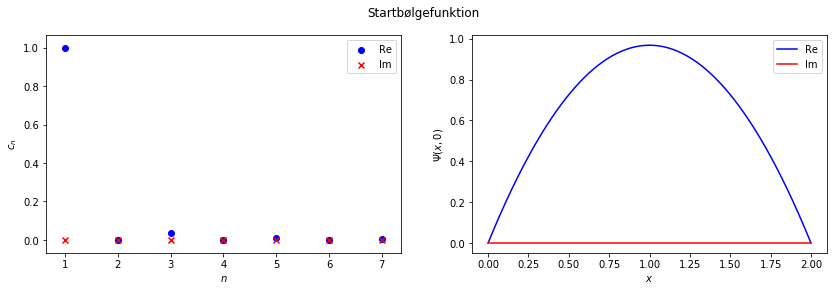

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(14,4))

axs[0].scatter(n_vec,np.real(cn_vec),color='b',marker='o',label='Re')
axs[0].scatter(n_vec,np.imag(cn_vec),color='r',marker='x',label='Im')
axs[0].legend()
axs[0].set_xlabel('$n$')
axs[0].set_ylabel('$c_n$')

axs[1].plot(x,np.real(Psi0),color='b',label='Re')
axs[1].plot(x,np.imag(Psi0),color='r',label='Im')
axs[1].legend()
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('$\Psi(x,0)$')

th = fig.suptitle('Startbølgefunktion') # suptitle metoden sætter title for hele figuren

Vi vil nu beregne bølgefunktionen til senere tider og vise denne i en animation. Først vælges en passende tidsakse (her vælges Nt = 200 elementer). Overvej eventuelt, hvorfor det beregnede $T$ giver en periodisk animation. Du kan også forsøge med andre værdier, alt efter hvilket eksempel der betragtes.

In [8]:
Nt = 200;                      # Antal elementer i tidsvektoren.
E1 = np.pi**2/2/a**2           # Energi for n = 1.
T = 2*np.pi/E1                 # Total tid for tidsvektor.
t_vec = np.linspace(0, T, num=Nt)  # Tidsvektoren

Vi allokerer plads i hukommelsen til bølgefunktionen $\Psi(x,t)$ i et array med Nt rækker og Nx søjler. Hver række kommer således til at svare til bølgefunktionen til et bestemt tidspunkt. Vi fortæller Python, at typen skal være et komplekst tal med argumentet dtype:

In [9]:
Psi = np.zeros((Nt,Nx),dtype=np.complex64)

Nedenfor beregnes $\Psi(x,t)$ for alle x og t.

In [10]:
Ncn = np.size(cn_vec)    # Antal af cn-koefficienter i beregningen ovenfor.
for i in range(Nt):      # i løber fra 0 til Nt-1. Svarer til rækker i Psi-arrayet.
    t = t_vec[i]         # Det aktuelle t i beregningen
    for j in range(Ncn): # j løber fra 0 til Ncn-1. Svarer til indgange i cn_vec eller n_vec.
        cn = cn_vec[j]
        n = n_vec[j]
        En = np.pi**2*n**2/2/a**2 # Den n'te energi, se ligning (2.30)
        psi_n = np.sqrt(2/a)*np.sin(n*np.pi*x/a)    # Den n'te stationære løsning, se ligning (2.31)
        Psi[i] = Psi[i] + cn*psi_n*np.exp(-1j*En*t) # Den i'te række i Psi-arrayet tillægges den n'te led fra (2.39)

Vi vil lave to figurer i animationen. Den første viser bølgefunktionens realdel (rød) og imaginærdel (blå). Den anden viser sandsynlighedsfordelingen $|\Psi(x,t)|^2$ (med start-bølgefunktionen vist med en stiplet kurve). Vi starter med at definere "tomme figurer" med passende akser samt de kurver vi ønsker at animere:

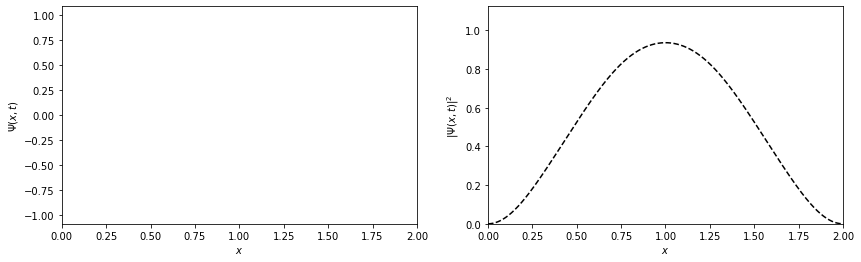

In [11]:
# Her starter definitionen af "den tomme figur for at komme i gang":
fig, axs = plt.subplots(1, 2, figsize=(14,4))

# Det er vigtigt at vi gemmer vores Line-objekter, så vi senere kan opdatere dem
RealPsi_line, = axs[0].plot([],[],color='b')
ImagPsi_line, = axs[0].plot([],[],color='r')
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$\Psi(x,t)$')
axs[0].set_xlim(0,a)
YLIMMAX = np.max(np.abs(Psi))*1.05
axs[0].set_ylim(-YLIMMAX,YLIMMAX)

axs[1].set_xlabel('$x$')
axs[1].set_ylabel('$|\Psi(x,t)|^2$')
axs[1].set_xlim(0,a)
YLIMMAX = np.max(np.abs(Psi)**2)*1.05
axs[1].set_ylim(0,YLIMMAX)
axs[1].plot(x,np.abs(Psi[0])**2,'k--')
NormSqrPsi_line, = axs[1].plot([],[],'k-')

Nu definerer vi vores update funktion. Denne funktion står for at opdaterer data på de kurver vi tidligere definerede og skal gives som argument til FuncAnimation klassen, som producere den endelige animation. Bemærk at dette kan tage noget tid!

In [12]:
# Nu begynder vi med opdateringsfunktionen for selve animationen:
from matplotlib import animation
# plt.rc('animation', html='jshtml') # Denne linje indstiller matplotlib så animationer afspilles i jupyter notebookk

def update(i):
    """
    Dette er funktionen der bliver kaldt af FuncAnimation klassen hvert tidsskridt for at opdatere figuren. 
    Den skal tage et heltal som input og returnere en iterable af alle ting på vores 
    figur som ændrer sig (dvs. de tre linjer). For mere info kan man skrive help(FuncAnimation)
    """
    RealPsi_line.set_data(x,np.real(Psi[i]))
    ImagPsi_line.set_data(x,np.imag(Psi[i]))
    NormSqrPsi_line.set_data(x, np.abs(Psi[i])**2)
    return RealPsi_line,ImagPsi_line,NormSqrPsi_line

# Nu hvor update funktionen er lavet kan vi lave vores animations objekt
anim = animation.FuncAnimation(fig, # figure object
                               update, # update and return artists
                               frames=Nt, # i in range(Nt), i passed to update 
                               interval=50, # delay between frames in ms
                               blit=True)

# FuncAnimation klassen kan så finde ud at lave vores animation som et stykke HTML kode
anim_html = anim.to_jshtml()

Vi kan så afspille vore animation

In [13]:
from IPython.display import HTML
HTML(anim_html)